In [129]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [130]:
df_train= pd.read_csv('bukken_train.csv')
df_train.head()

,id,price_per_tsubo,use_classification,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
0,873361,410000,住宅地,12,65,ほぼ長方形,6.3,北東,私道,4.0,60,200
1,743914,320000,住宅地,60,155,ほぼ長方形,14.0,北東,市道,4.0,40,80
2,728916,610000,住宅地,26,100,ほぼ長方形,13.0,東,市道,6.0,50,100
3,670311,300000,住宅地,60,210,不整形,18.0,北,私道,5.0,40,80
4,803131,150000,住宅地,30,110,不整形,4.5,南西,市道,4.0,40,80


In [131]:
#行と列の長さを確認
print(df_train.shape)
# 各特徴量の欠損値をカウント
print(df_train.isnull().sum())
df_train.head()

(345, 12)
id                        0
price_per_tsubo           0
use_classification        0
minute_to_station         0
land_space                0
land_shape                0
frontage_length           0
frontal_road_direction    0
frontal_road_kind         0
frontal_road_width        0
building_land_ratio       0
floor_land_ratio          0
dtype: int64


,id,price_per_tsubo,use_classification,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
0,873361,410000,住宅地,12,65,ほぼ長方形,6.3,北東,私道,4.0,60,200
1,743914,320000,住宅地,60,155,ほぼ長方形,14.0,北東,市道,4.0,40,80
2,728916,610000,住宅地,26,100,ほぼ長方形,13.0,東,市道,6.0,50,100
3,670311,300000,住宅地,60,210,不整形,18.0,北,私道,5.0,40,80
4,803131,150000,住宅地,30,110,不整形,4.5,南西,市道,4.0,40,80


In [132]:
# 列を削除
df1_train = df_train.drop('use_classification', axis=1)
df1_train.head()

,id,price_per_tsubo,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
0,873361,410000,12,65,ほぼ長方形,6.3,北東,私道,4.0,60,200
1,743914,320000,60,155,ほぼ長方形,14.0,北東,市道,4.0,40,80
2,728916,610000,26,100,ほぼ長方形,13.0,東,市道,6.0,50,100
3,670311,300000,60,210,不整形,18.0,北,私道,5.0,40,80
4,803131,150000,30,110,不整形,4.5,南西,市道,4.0,40,80


In [133]:
#trainデータの、idとインデックスを昇順にしたもの
#重回帰分析のDataFrameの結合参照
#ascending=Trueで、昇順に並び変わる
df1_train=pd.concat([df1_train],axis=0,ignore_index=True)
df1_train=df1_train.sort_values(by=["id"], ascending=True)
print(df1_train.shape)
df1_train

(345, 11)


,id,price_per_tsubo,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
248,651349,280000,60,140,長方形,8.0,北,市道,5.0,40,80
21,670252,250000,60,140,長方形,8.0,北東,私道,5.0,40,80
75,670253,580000,19,200,ほぼ正方形,14.0,東,区画街路,5.0,60,200
3,670311,300000,60,210,不整形,18.0,北,私道,5.0,40,80
203,670349,500000,30,145,ほぼ整形,14.0,北,私道,5.0,40,80
180,670364,200000,60,185,ほぼ長方形,15.0,東,私道,4.5,40,80
184,670376,400000,30,165,ほぼ台形,12.0,南西,市道,4.0,40,80
222,670380,100000,30,2000,不整形,50.0,南西,道路,4.0,40,80
145,670389,320000,30,870,不整形,14.0,南,市道,3.4,40,80
208,670390,580000,30,145,ほぼ長方形,9.0,北東,都道,8.0,60,200


In [134]:
df1=pd.get_dummies(df１_train['land_shape'])
df1

,ほぼ台形,ほぼ整形,ほぼ正方形,ほぼ長方形,不整形,台形,正方形,袋地等,長方形
248,0,0,0,0,0,0,0,0,1
21,0,0,0,0,0,0,0,0,1
75,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
203,0,1,0,0,0,0,0,0,0
180,0,0,0,1,0,0,0,0,0
184,1,0,0,0,0,0,0,0,0
222,0,0,0,0,1,0,0,0,0
145,0,0,0,0,1,0,0,0,0
208,0,0,0,1,0,0,0,0,0


In [135]:
#上で得られたものを横に結合
#方角、道路種類に関しても同様の処理を行い、元の変数を削除
df2 = pd.concat([df1_train, df1], axis=1)
df2.head()

,id,price_per_tsubo,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,ほぼ台形,ほぼ整形,ほぼ正方形,ほぼ長方形,不整形,台形,正方形,袋地等,長方形
248,651349,280000,60,140,長方形,8.0,北,市道,5.0,40,80,0,0,0,0,0,0,0,0,1
21,670252,250000,60,140,長方形,8.0,北東,私道,5.0,40,80,0,0,0,0,0,0,0,0,1
75,670253,580000,19,200,ほぼ正方形,14.0,東,区画街路,5.0,60,200,0,0,1,0,0,0,0,0,0
3,670311,300000,60,210,不整形,18.0,北,私道,5.0,40,80,0,0,0,0,1,0,0,0,0
203,670349,500000,30,145,ほぼ整形,14.0,北,私道,5.0,40,80,0,1,0,0,0,0,0,0,0


In [136]:
# 列を削除
df3= df2.drop('land_shape', axis=1)
df3.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,ほぼ台形,ほぼ整形,ほぼ正方形,ほぼ長方形,不整形,台形,正方形,袋地等,長方形
248,651349,280000,60,140,8.0,北,市道,5.0,40,80,0,0,0,0,0,0,0,0,1
21,670252,250000,60,140,8.0,北東,私道,5.0,40,80,0,0,0,0,0,0,0,0,1
75,670253,580000,19,200,14.0,東,区画街路,5.0,60,200,0,0,1,0,0,0,0,0,0
3,670311,300000,60,210,18.0,北,私道,5.0,40,80,0,0,0,0,1,0,0,0,0
203,670349,500000,30,145,14.0,北,私道,5.0,40,80,0,1,0,0,0,0,0,0,0


In [137]:
df4=pd.get_dummies(df１_train['frontal_road_direction'])
df4

,北,北東,北西,南,南東,南西,東,西
248,1,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0
75,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0
203,1,0,0,0,0,0,0,0
180,0,0,0,0,0,0,1,0
184,0,0,0,0,0,1,0,0
222,0,0,0,0,0,1,0,0
145,0,0,0,1,0,0,0,0
208,0,1,0,0,0,0,0,0


In [138]:
df5 = pd.concat([df3, df4], axis=1)
df5.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,...,袋地等,長方形,北,北東,北西,南,南東,南西,東,西
248,651349,280000,60,140,8.0,北,市道,5.0,40,80,...,0,1,1,0,0,0,0,0,0,0
21,670252,250000,60,140,8.0,北東,私道,5.0,40,80,...,0,1,0,1,0,0,0,0,0,0
75,670253,580000,19,200,14.0,東,区画街路,5.0,60,200,...,0,0,0,0,0,0,0,0,1,0
3,670311,300000,60,210,18.0,北,私道,5.0,40,80,...,0,0,1,0,0,0,0,0,0,0
203,670349,500000,30,145,14.0,北,私道,5.0,40,80,...,0,0,1,0,0,0,0,0,0,0


In [139]:
df6= df5.drop('frontal_road_direction', axis=1)
df6.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,ほぼ台形,...,袋地等,長方形,北,北東,北西,南,南東,南西,東,西
248,651349,280000,60,140,8.0,市道,5.0,40,80,0,...,0,1,1,0,0,0,0,0,0,0
21,670252,250000,60,140,8.0,私道,5.0,40,80,0,...,0,1,0,1,0,0,0,0,0,0
75,670253,580000,19,200,14.0,区画街路,5.0,60,200,0,...,0,0,0,0,0,0,0,0,1,0
3,670311,300000,60,210,18.0,私道,5.0,40,80,0,...,0,0,1,0,0,0,0,0,0,0
203,670349,500000,30,145,14.0,私道,5.0,40,80,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
df7=pd.get_dummies(df１_train['frontal_road_kind'])
df7

,区画街路,国道,市道,町道,県道,私道,農道,道路,都道
248,0,0,1,0,0,0,0,0,0
21,0,0,0,0,0,1,0,0,0
75,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
203,0,0,0,0,0,1,0,0,0
180,0,0,0,0,0,1,0,0,0
184,0,0,1,0,0,0,0,0,0
222,0,0,0,0,0,0,0,1,0
145,0,0,1,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,1


In [141]:
df8 = pd.concat([df6, df7], axis=1)
df8.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,ほぼ台形,...,西,区画街路,国道,市道,町道,県道,私道,農道,道路,都道
248,651349,280000,60,140,8.0,市道,5.0,40,80,0,...,0,0,0,1,0,0,0,0,0,0
21,670252,250000,60,140,8.0,私道,5.0,40,80,0,...,0,0,0,0,0,0,1,0,0,0
75,670253,580000,19,200,14.0,区画街路,5.0,60,200,0,...,0,1,0,0,0,0,0,0,0,0
3,670311,300000,60,210,18.0,私道,5.0,40,80,0,...,0,0,0,0,0,0,1,0,0,0
203,670349,500000,30,145,14.0,私道,5.0,40,80,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
df9= df8.drop('frontal_road_kind', axis=1)
df9.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,ほぼ台形,ほぼ整形,...,西,区画街路,国道,市道,町道,県道,私道,農道,道路,都道
248,651349,280000,60,140,8.0,5.0,40,80,0,0,...,0,0,0,1,0,0,0,0,0,0
21,670252,250000,60,140,8.0,5.0,40,80,0,0,...,0,0,0,0,0,0,1,0,0,0
75,670253,580000,19,200,14.0,5.0,60,200,0,0,...,0,1,0,0,0,0,0,0,0,0
3,670311,300000,60,210,18.0,5.0,40,80,0,0,...,0,0,0,0,0,0,1,0,0,0
203,670349,500000,30,145,14.0,5.0,40,80,0,1,...,0,0,0,0,0,0,1,0,0,0


In [143]:
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
df9_pickup = df9.loc[:, ['minute_to_station', 'land_space','台形','正方形','長方形','北','北東','北西','南','南東','南西','東','西']]

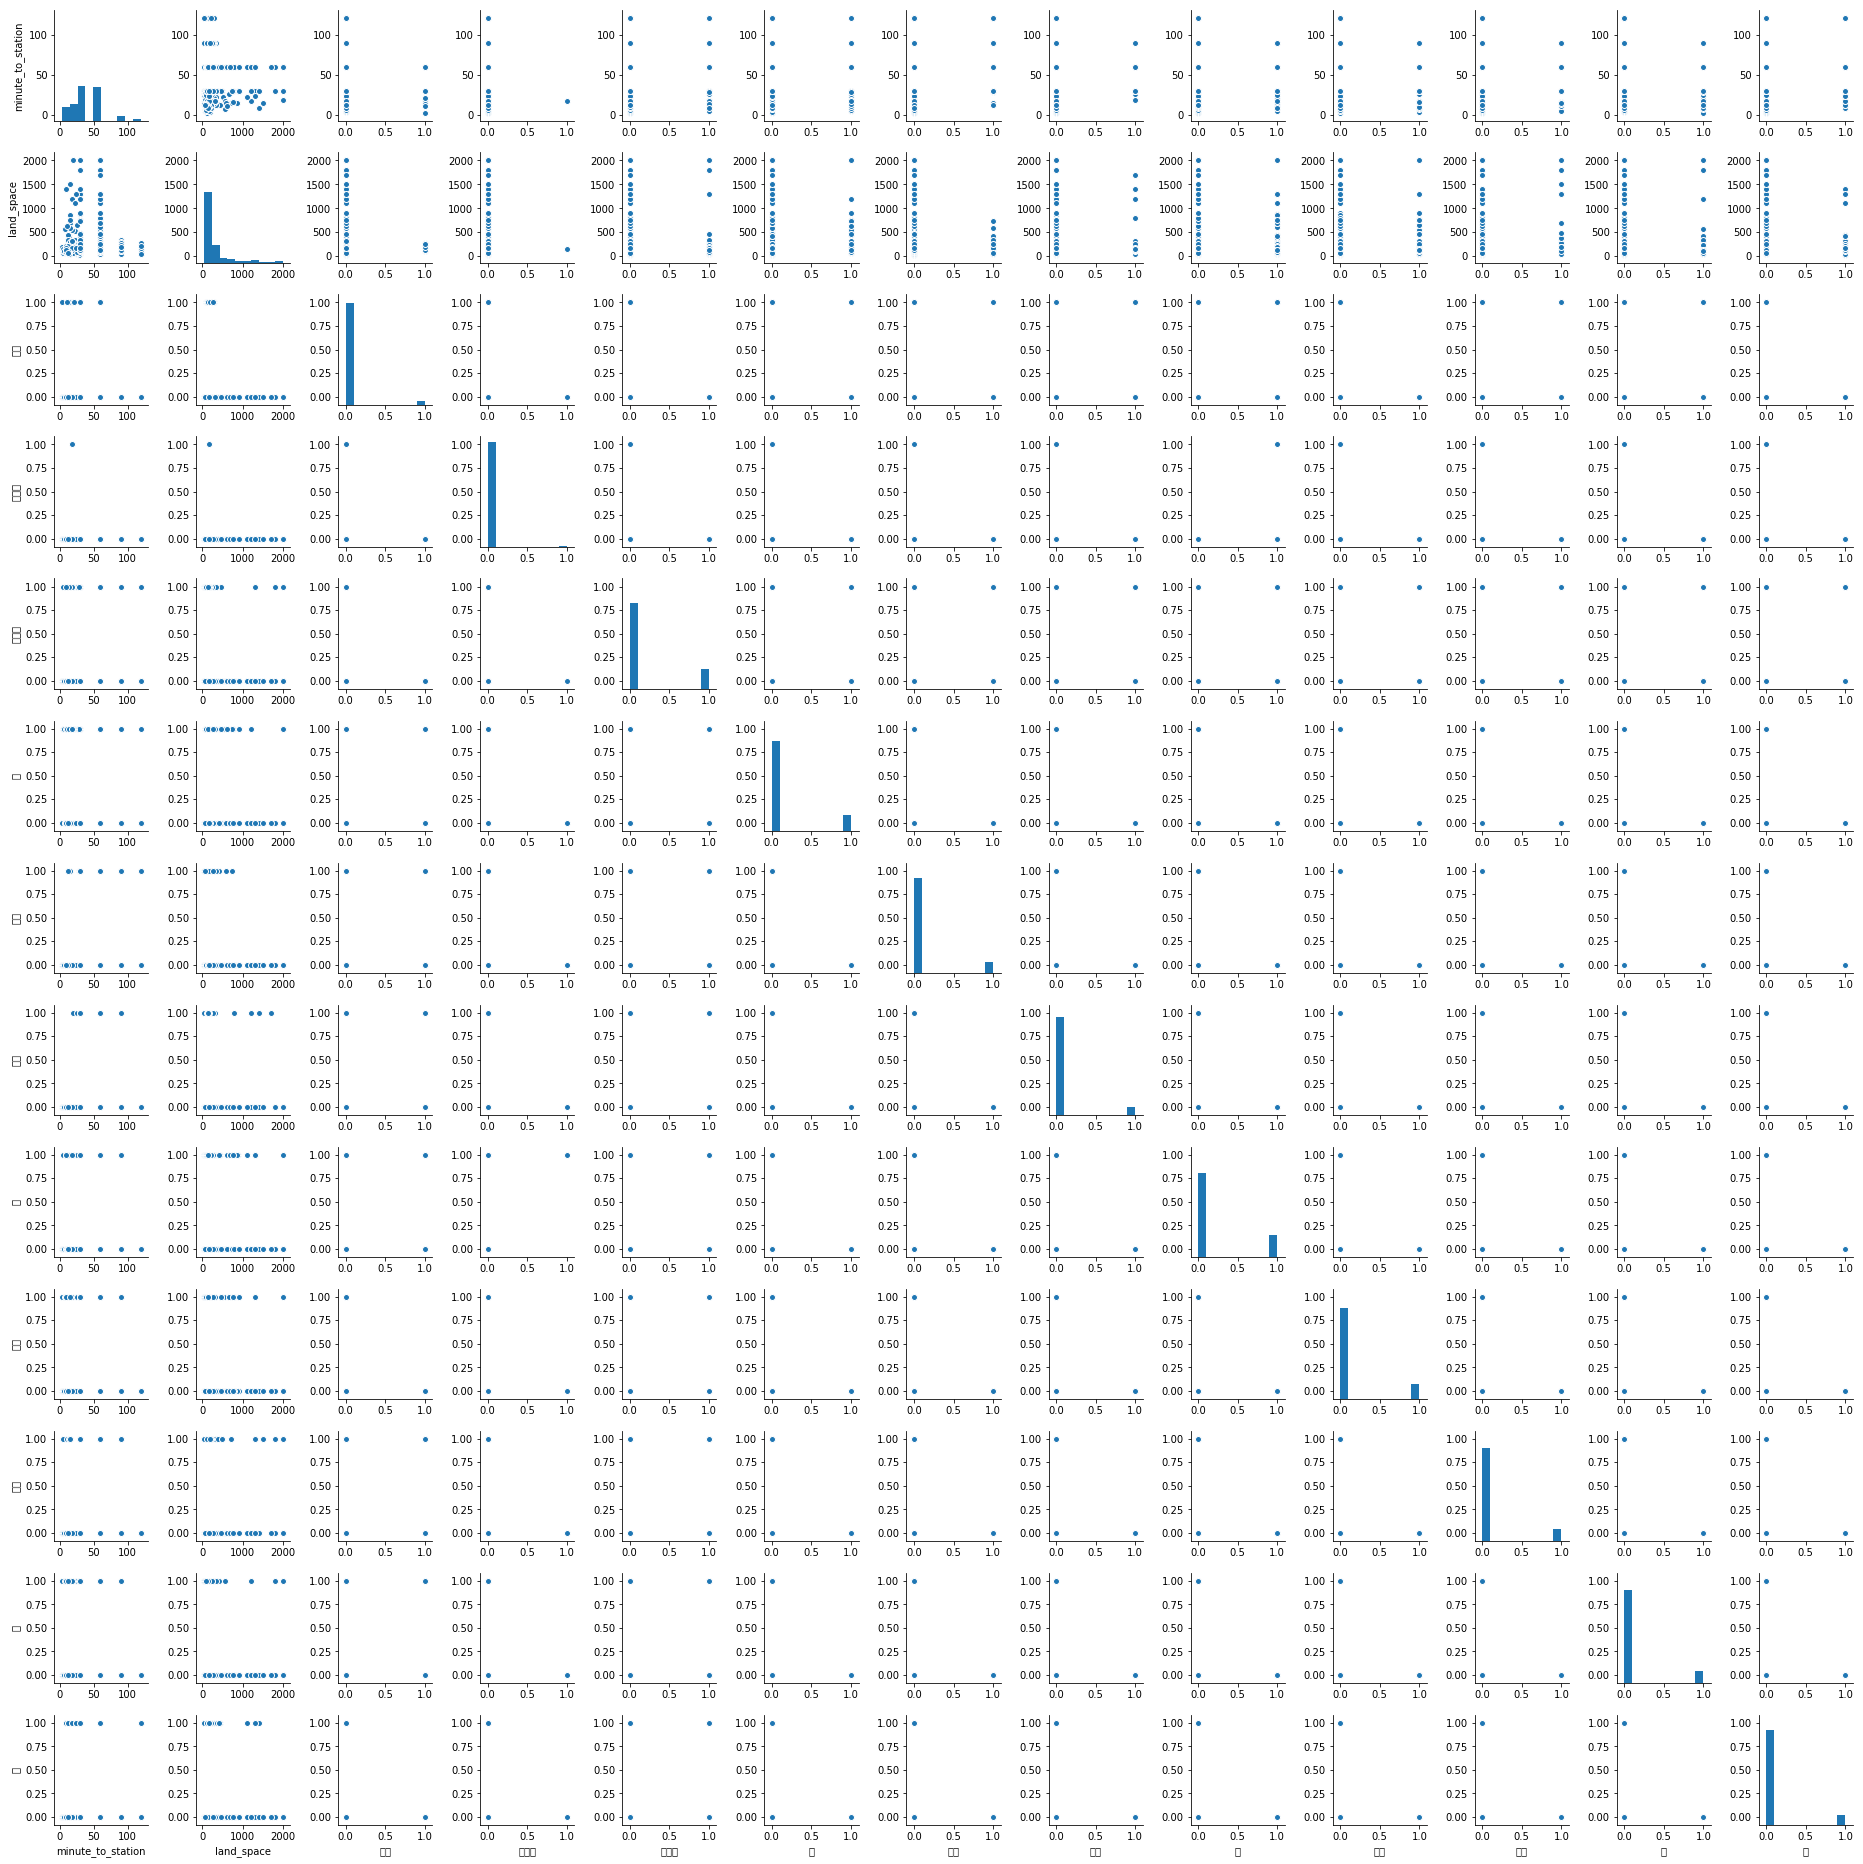

In [144]:
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(df9_pickup, size=2.0)
plt.show()

In [145]:
#説明変数を決め、これで説明変数と目的変数が決まったのでモデルを作れば良い(重回帰モデル？)

In [146]:
# 説明変数のデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
X_train = df9.loc[:, ['minute_to_station', 'land_space','台形','正方形','長方形','北','北東','北西','南','南東','南西','東','西']].values
X_train

array([[ 60, 140,   0, ...,   0,   0,   0],
       [ 60, 140,   0, ...,   0,   0,   0],
       [ 19, 200,   0, ...,   0,   1,   0],
       ...,
       [ 60, 250,   1, ...,   0,   0,   0],
       [ 12,  65,   0, ...,   0,   0,   0],
       [ 30, 160,   0, ...,   0,   0,   1]])

In [147]:
df_test= pd.read_csv('bukken_test.csv')
df_test.head()

,id,price_per_tsubo,use_classification,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
0,796263,1000000,住宅地,8,140,長方形,10.0,西,市道,5.0,60,200
1,721758,890000,住宅地,13,85,ほぼ長方形,11.5,南,市道,4.0,80,200
2,728990,880000,住宅地,14,115,長方形,8.0,南東,市道,6.0,60,200
3,844020,880000,住宅地,13,110,長方形,6.5,南,市道,5.0,80,200
4,844104,880000,住宅地,9,145,台形,13.5,南,市道,6.0,60,200


In [148]:
# DataFrameの.valuesメソッドでarrayに変換できます
y_train = df.loc[:, ['price_per_tsubo']].values

# どのように入っているか、最初の１０個を表示して確認
y_train[:10]

array([[280000],
       [250000],
       [580000],
       [300000],
       [500000],
       [200000],
       [400000],
       [100000],
       [320000],
       [580000]])

In [149]:
# データ全体のサンプル数を確認
print(X_train.shape)
print(y_train.shape)

(345, 13)
(345, 1)


In [150]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [151]:
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
# 定数項を出力
lr.intercept_

array([637193.30247018])

In [153]:
# 偏回帰係数を出力
lr.coef_

array([[ -5788.81297077,   -111.67457268,  23814.05895331,
         77051.75140885,  43854.41337914,  21979.27491941,
         -9324.9397488 ,  -8481.822944  ,  27263.13836028,
        -41462.04552872,  -9533.14919232,  11057.8807513 ,
          8501.66338285]])

In [154]:
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X_train) # すべての説明変数を変換
y_std = ss.fit_transform(y_train)

/Users/harukaishihama/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [155]:
# 標準化された説明変数を確認
X_std[:5]

array([[ 0.87505378, -0.43048082, -0.19788033, -0.05391639,  2.09538183,
         2.40098019, -0.34132807, -0.2795085 , -0.50452498, -0.40686674,
        -0.36214298, -0.36214298, -0.33064295],
       [ 0.87505378, -0.43048082, -0.19788033, -0.05391639,  2.09538183,
        -0.41649656,  2.92973264, -0.2795085 , -0.50452498, -0.40686674,
        -0.36214298, -0.36214298, -0.33064295],
       [-0.86876641, -0.27048526, -0.19788033, -0.05391639, -0.47723999,
        -0.41649656, -0.34132807, -0.2795085 , -0.50452498, -0.40686674,
        -0.36214298,  2.76134025, -0.33064295],
       [ 0.87505378, -0.24381933, -0.19788033, -0.05391639, -0.47723999,
         2.40098019, -0.34132807, -0.2795085 , -0.50452498, -0.40686674,
        -0.36214298, -0.36214298, -0.33064295],
       [-0.40091221, -0.41714786, -0.19788033, -0.05391639, -0.47723999,
         2.40098019, -0.34132807, -0.2795085 , -0.50452498, -0.40686674,
        -0.36214298, -0.36214298, -0.33064295]])

In [156]:
# 標準化された目的変数を確認
y_std[:10]

array([[-0.49713529],
       [-0.63668156],
       [ 0.89832746],
       [-0.40410444],
       [ 0.52620406],
       [-0.86925869],
       [ 0.06104981],
       [-1.33441293],
       [-0.31107359],
       [ 0.89832746]])

In [157]:
# 標準化した説明変数の平均を確認
# arrayのmean()メソッドで出力できる
X_std.mean()

9.307555345798414e-18

In [158]:
# 標準化した目的変数の平均を確認
# arrayのmean()メソッドで出力できる
y_std.mean()

1.8021011414205438e-17

In [159]:
# 標準化した説明変数の標準偏差を確認
# arrayのstd()メソッドで出力できる
X_std.std()

1.0

In [160]:
# 標準化した目的変数の標準偏差を確認
# arrayのmean()メソッドで出力できる
y_std.std()

1.0

In [161]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
# 標準偏回帰係数を出力
lr_std.coef_

array([[-6.30690990e-01, -2.05955584e-01,  1.40539572e-02,
         5.55596907e-04,  7.42848700e-02,  2.99116109e+13,
         2.57638961e+13,  2.18487222e+13,  3.38919390e+13,
         2.94187994e+13,  2.69811816e+13,  2.69811816e+13,
         2.51189049e+13]])

In [163]:
lr_std.score(X_std,y_std)

0.48634511061747127